In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

In [2]:
cs = pd.read_excel('ThinkRobots_2019.xlsx', sheet_name='Customer Segments')

In [3]:
cs.rename(columns={"Session Count": "Session"}, inplace=True)

In [4]:
cs.dtypes

Customer ID                           int64
Free Account Created Date    datetime64[ns]
Last Seen                    datetime64[ns]
Session                               int64
Segment                              object
Billing Account #                    object
dtype: object

In [214]:
cs.head()

,Customer ID,Free Account Created Date,Last Seen,Session,Segment,Billing Account #
0,1,2017-05-29,2019-04-05 08:02:32,1379,Marketing Segment 2,AX#93195
1,2,2017-12-17,2019-04-27 13:23:56,531,Marketing Segment 1,AX#20438
2,3,2017-01-30,2019-04-22 15:38:09,317,Marketing Segment 1,AX#60779
3,4,2017-02-03,2019-04-23 16:30:46,349,Marketing Segment 1,AX#91209
4,5,2017-03-18,2019-04-05 13:16:33,1158,Marketing Segment 2,AX#57000


In [4]:
cn = pd.read_excel('ThinkRobots_2019.xlsx',sheet_name='Customer Names')

In [5]:
bs = pd.read_excel('ThinkRobots_2019.xlsx',sheet_name='Billing Status')

In [215]:
bs.head()

,Billing Account #,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Charges
0,AX#10042,paying,2019-03-20,NaT,332.800000
1,AX#10114,paying,2019-01-17,NaT,451.133333
2,AX#10259,paying,2018-09-28,NaT,1886.800000
3,AX#10695,paying,2018-12-21,NaT,797.866667
4,AX#10855,paying,2019-04-01,NaT,189.000000


In [6]:
bs.rename(columns={"Total Charges": "Charges"}, inplace=True)

In [21]:
bs.dtypes

Billing Account #                          object
Account Status                             object
Upgraded Account Created Date      datetime64[ns]
Upgraded Account Cancelled Date    datetime64[ns]
Total Charges                             float64
dtype: object

In [7]:
mpc = pd.read_excel('ThinkRobots_2019.xlsx',sheet_name='Major Product Changes')

In [17]:
bs.isnull().sum()

Billing Account #                    0
Account Status                       0
Upgraded Account Created Date        0
Upgraded Account Cancelled Date    878
Total Charges                        0
dtype: int64

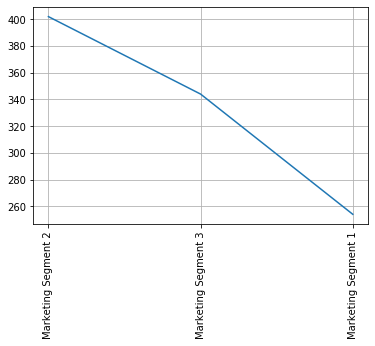

In [8]:
plt.plot(cs.Segment.value_counts().head(20))
plt.xticks(rotation=90)
plt.grid()

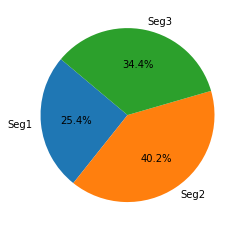

In [41]:
seg1 = cs[cs["Segment"]== "Marketing Segment 1"].shape[0]
seg2 = cs[cs["Segment"]== "Marketing Segment 2"].shape[0]
seg3 = cs[cs["Segment"]== "Marketing Segment 3"].shape[0]

total = cs.shape[0]

labels = 'Seg1', 'Seg2', 'Seg3'
sizes = [seg1/total, seg2/total, seg3/total]
explode = (0,0,0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, radius=1)
plt.savefig('cs by customer.png')
plt.show()

In [56]:
cs.Session.mean()

310.975

In [212]:
nochurn.shape

(891, 10)

In [213]:
bs.shape

(1000, 5)

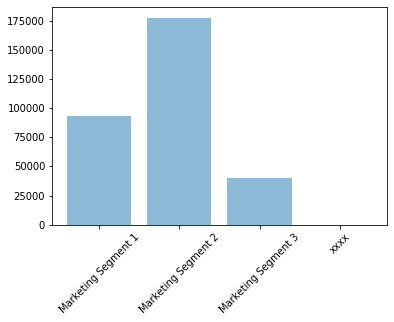

In [10]:
segment = ('Marketing Segment 1', 'Marketing Segment 2', 'Marketing Segment 3','xxxx')
ind = np.arange(len(segment))
count = [cs[cs.Segment == 'Marketing Segment 1'].Session.sum(),cs[cs.Segment == 'Marketing Segment 2'].Session.sum(),cs[cs.Segment == 'Marketing Segment 3'].Session.sum(),0]

plt.bar(ind, count, align='center', alpha=0.5)
plt.xticks(ind, segment, rotation=45)
#plt.ylabel('incident count')
#plt.title('incidents per year')
plt.show()

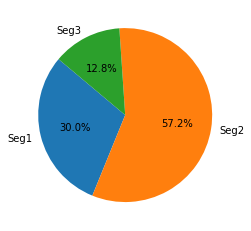

In [42]:
seg1 = cs[cs["Segment"]== "Marketing Segment 1"].Session.sum()
seg2 = cs[cs["Segment"]== "Marketing Segment 2"].Session.sum()
seg3 = cs[cs["Segment"]== "Marketing Segment 3"].Session.sum()

total = cs.Session.sum()

labels = 'Seg1', 'Seg2', 'Seg3'
sizes = [seg1/total, seg2/total, seg3/total]
explode = (0,0,0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, radius=1)
plt.savefig('cs by session.png')
plt.show()

In [165]:
bs_cs = pd.merge(bs, cs, on='Billing Account #')

In [65]:
bs_cs.head()

,Billing Account #,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Charges,Customer ID,Free Account Created Date,Last Seen,Session,Segment
0,AX#10042,paying,2019-03-20,NaT,332.800000,801,2019-03-19,2019-04-18 20:37:12,8,Marketing Segment 3
1,AX#10114,paying,2019-01-17,NaT,451.133333,399,2018-11-14,2019-04-28 14:40:36,7,Marketing Segment 1
2,AX#10259,paying,2018-09-28,NaT,1886.800000,199,2018-07-14,2019-04-28 14:26:40,10744,Marketing Segment 2
3,AX#10695,paying,2018-12-21,NaT,797.866667,364,2018-10-27,2019-04-28 12:40:38,14,Marketing Segment 3
4,AX#10855,paying,2019-04-01,NaT,189.000000,860,2019-04-01,2019-04-28 14:59:42,1,Marketing Segment 3


In [46]:
bs_cs.isnull().sum()

Billing Account #                    0
Account Status                       0
Upgraded Account Created Date        0
Upgraded Account Cancelled Date    891
Charges                              0
Customer ID                          0
Free Account Created Date            0
Last Seen                            0
Session                              0
Segment                              0
dayf                                 0
monthf                               0
yearf                                0
weekdayf                             0
Day_of_yearf                         0
dayu                               891
monthu                             891
yearu                              891
weekdayu                           891
Day_of_yearu                       891
dtype: int64

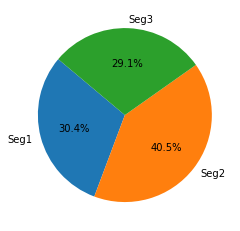

In [43]:
seg1 = bs_cs[bs_cs["Segment"]== "Marketing Segment 1"].Charges.sum()
seg2 = bs_cs[bs_cs["Segment"]== "Marketing Segment 2"].Charges.sum()
seg3 = bs_cs[bs_cs["Segment"]== "Marketing Segment 3"].Charges.sum()

total = bs_cs.Charges.sum()

labels = 'Seg1', 'Seg2', 'Seg3'
sizes = [seg1/total, seg2/total, seg3/total]
explode = (0,0,0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, radius=1)
plt.savefig('cs by revenue.png')
plt.show()

In [61]:
bs_cs.Charges.mean()

560.8469099276792

In [66]:
churn = bs_cs[bs_cs['Account Status']== 'cancelled']

In [67]:
nochurn = bs_cs[bs_cs['Account Status']== 'paying']

In [16]:
churn.Session.mean()

19.349593495934958

In [65]:
nochurn.Session.mean()

349.6509539842873

In [66]:
churn.Charges.mean()

463.9357723577235

In [67]:
nochurn.Charges.mean()

574.2252151141038

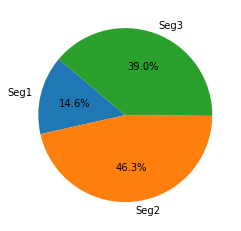

In [44]:
seg1 = churn[churn["Segment"]== "Marketing Segment 1"].shape[0]
seg2 = churn[churn["Segment"]== "Marketing Segment 2"].shape[0]
seg3 = churn[churn["Segment"]== "Marketing Segment 3"].shape[0]

total = churn.shape[0]

labels = 'Seg1', 'Seg2', 'Seg3'
sizes = [seg1/total, seg2/total, seg3/total]
explode = (0,0,0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, radius=1)
plt.savefig('churn by segment.png')
plt.show()

In [68]:
delta = (churn['Upgraded Account Created Date'] - churn['Upgraded Account Cancelled Date'])

In [37]:
churn.head()

,Billing Account #,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Charges,Customer ID,Free Account Created Date,Last Seen,Session,Segment
25,AX#12986,cancelled,2019-04-21,NaT,33.833333,322,2018-10-05,2019-04-26 19:45:48,1,Marketing Segment 2
41,AX#14045,cancelled,2019-01-19,2019-03-17,229.900000,533,2018-12-29,2019-04-26 18:12:32,10,Marketing Segment 3
48,AX#14562,cancelled,2018-09-05,2018-11-05,372.100000,262,2018-09-05,2018-12-12 23:06:25,39,Marketing Segment 2
49,AX#14616,cancelled,2018-03-16,2018-05-22,294.800000,108,2018-03-10,2018-05-22 05:22:40,3,Marketing Segment 2
71,AX#16760,cancelled,2018-06-15,2018-07-26,343.033333,166,2018-06-14,2018-07-29 18:15:47,2,Marketing Segment 1


In [70]:
delta.mean()

Timedelta('-91 days +21:25:17.355371')

In [167]:
bs_cs["dayf"] = bs_cs["Free Account Created Date"].dt.day
bs_cs["monthf"] = bs_cs["Free Account Created Date"].dt.month
bs_cs["yearf"] = bs_cs["Free Account Created Date"].dt.year
bs_cs["weekdayf"] = bs_cs["Free Account Created Date"].dt.weekday
bs_cs['Day_of_yearf'] = bs_cs['Free Account Created Date'].dt.dayofyear

In [169]:
bs_cs["dayu"] = bs_cs["Free Account Created Date"].dt.day
bs_cs["monthu"] = bs_cs["Free Account Created Date"].dt.month
bs_cs["yearu"] = bs_cs["Free Account Created Date"].dt.year
bs_cs["weekdayu"] = bs_cs["Free Account Created Date"].dt.weekday
bs_cs['Day_of_yearu'] = bs_cs['Free Account Created Date'].dt.dayofyear

In [21]:
data2017f = bs_cs[bs_cs.yearf == 2017]
data2018f = bs_cs[bs_cs.yearf == 2018]
data2019f = bs_cs[bs_cs.yearf == 2019]

In [75]:
bs_cs.yearf.unique()

array([2019, 2018, 2017], dtype=int64)

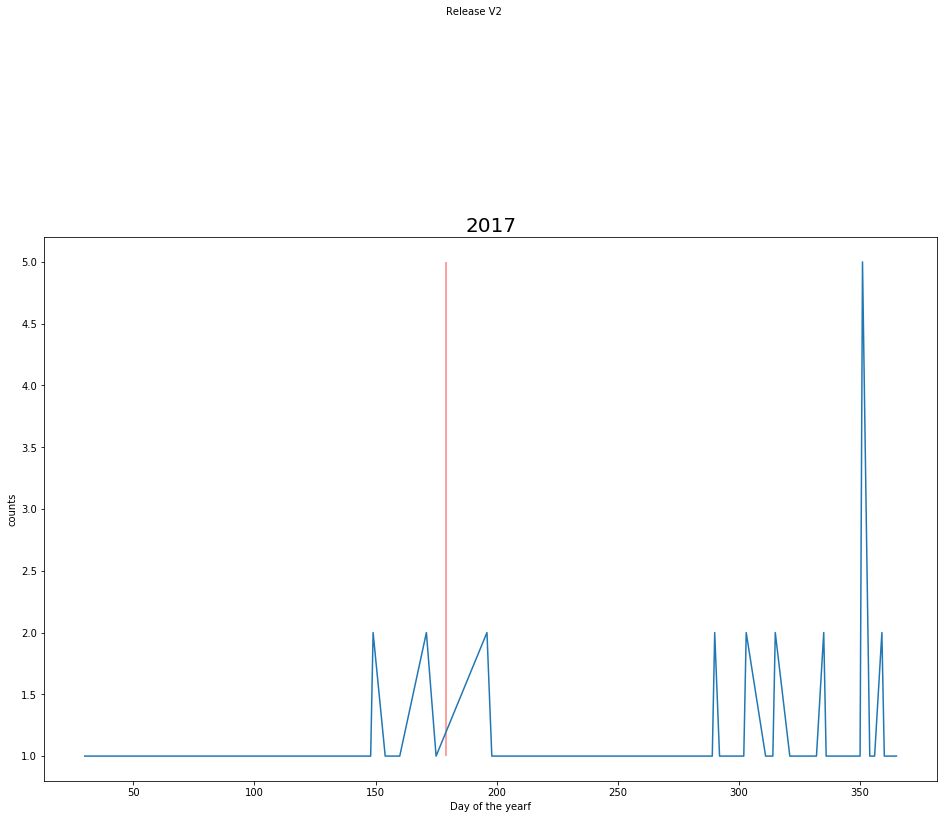

In [22]:
data_release2017f = data2017f.groupby(['Day_of_yearf']).size().reset_index(name='counts')

release2017 = pd.Series(['2017-06-28']) # Release V2

release2017 = pd.to_datetime(release2017).dt.dayofyear
release_names = ['Release V2']

fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x='Day_of_yearf', y='counts', ax=ax, data=data_release2017f)
plt.xlabel('Day of the yearf')
plt.vlines(release2017, 1, 5, alpha=0.5, color ='r')
plt.title('2017', fontsize=20)
for i in range(len(release2017)):
    plt.text(x=release2017[i], y=7, s=release_names[i])
    
#plt.savefig('figures/national holiday 2014.png')

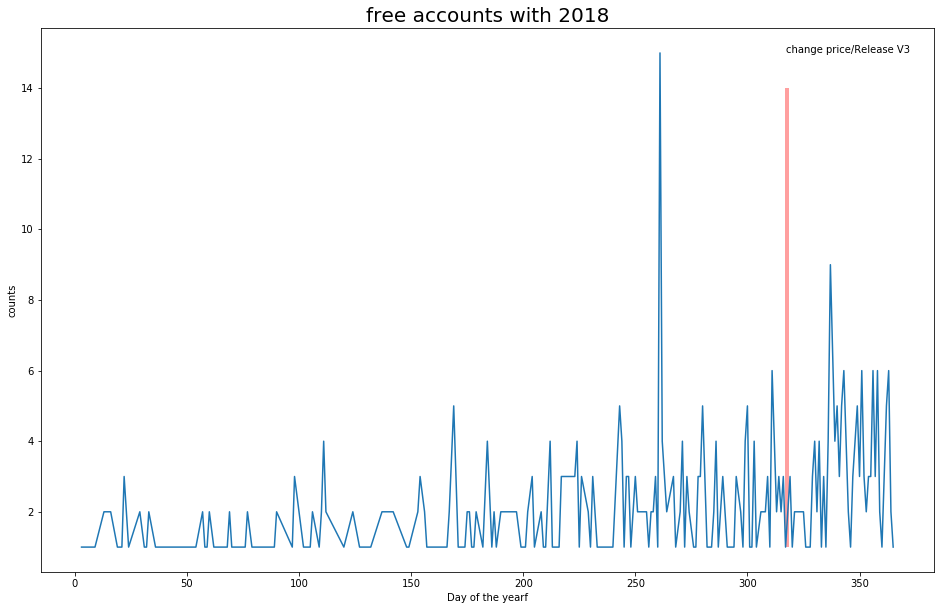

In [203]:
data_release2018f = data2018f.groupby(['Day_of_yearf']).size().reset_index(name='counts')

release2018 = pd.Series(['2018-11-13', #product pricing change
                         '2018-11-14']) # Release V3

release2018 = pd.to_datetime(release2018).dt.dayofyear
release_names = ['change price/Release V3',
                 '']

fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x='Day_of_yearf', y='counts', ax=ax, data=data_release2018f)
plt.xlabel('Day of the yearf')
plt.vlines(release2018, 1, 14, alpha=0.5, color ='r')
plt.title('free accounts with 2018', fontsize=20)
for i in range(len(release2018)):
    plt.text(x=release2018[i], y=15, s=release_names[i])

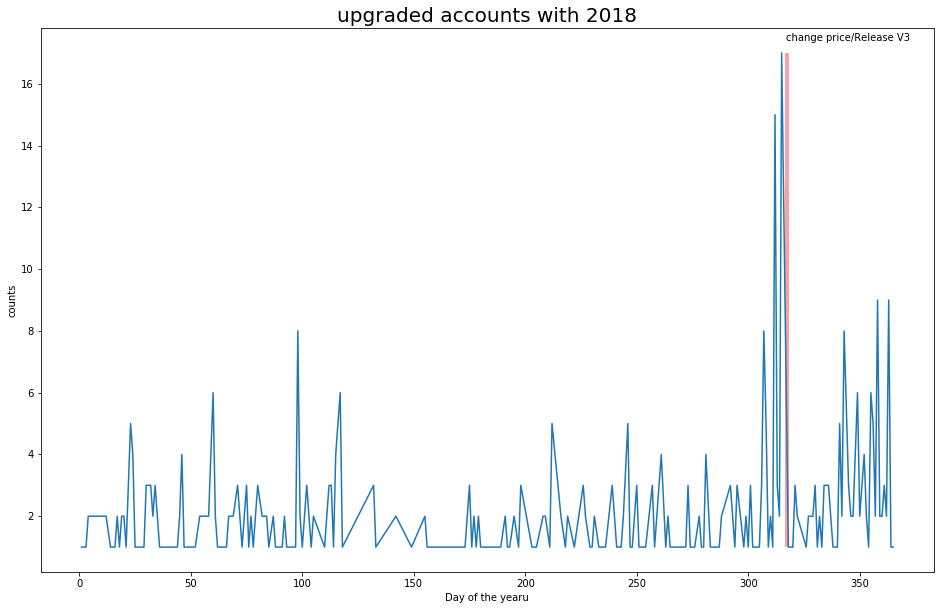

In [208]:
data_release2018f = data2018f.groupby(['Day_of_yearu']).size().reset_index(name='counts')

release2018 = pd.Series(['2018-11-13', #product pricing change
                         '2018-11-14']) # Release V3

release2018 = pd.to_datetime(release2018).dt.dayofyear
release_names = ['change price/Release V3',
                 '']

fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x='Day_of_yearu', y='counts', ax=ax, data=data_release2018f)
plt.xlabel('Day of the yearu')
plt.vlines(release2018, 1, 17, alpha=0.5, color ='r')
plt.title('upgraded accounts with 2018', fontsize=20)
for i in range(len(release2018)):
    plt.text(x=release2018[i], y=17.4, s=release_names[i])

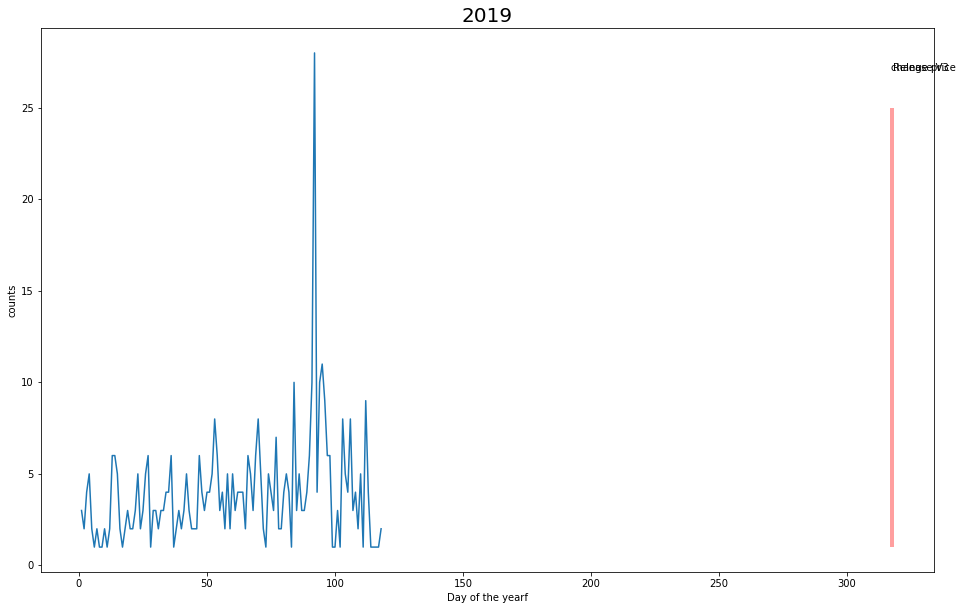

In [24]:
data_release2019f = data2019f.groupby(['Day_of_yearf']).size().reset_index(name='counts')

release2019 = pd.Series(['2019-11-13', #product pricing change
                         '2019-11-14']) # Release V3

release2019 = pd.to_datetime(release2019).dt.dayofyear
release_names = ['change price',
                 'Release V3']

fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x='Day_of_yearf', y='counts', ax=ax, data=data_release2019f)
plt.xlabel('Day of the yearf')
plt.vlines(release2019, 1, 25, alpha=0.5, color ='r')
plt.title('2019', fontsize=20)
for i in range(len(release2019)):
    plt.text(x=release2019[i], y=27, s=release_names[i])

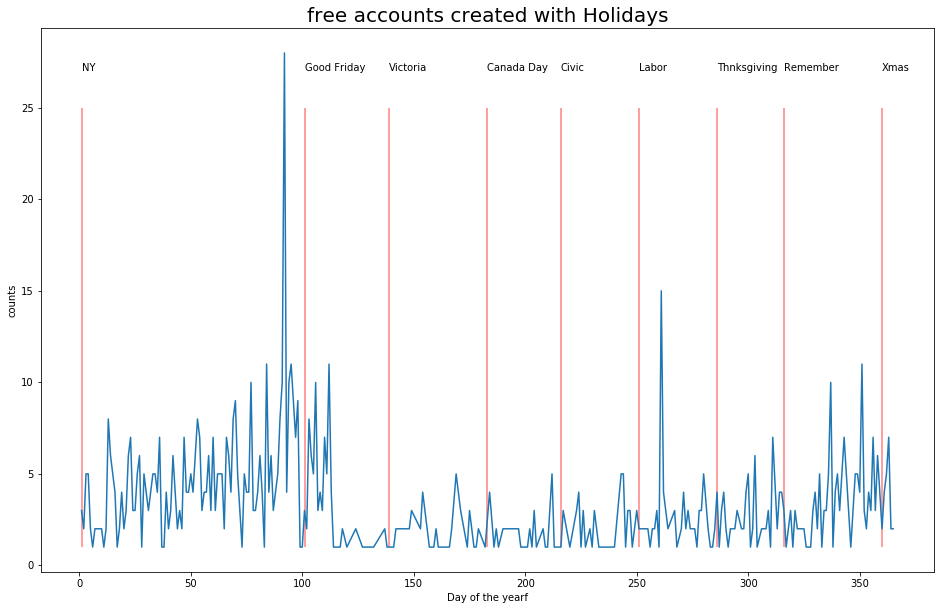

In [197]:
data_holidays = bs_cs.groupby(['Day_of_yearf']).size().reset_index(name='counts')

holidays = pd.Series(['2020-01-01', # New Years Day
                     '2020-04-10', # Good Friday
                     '2020-05-18', # Victoria Day
                     '2020-07-01', # Canada Day
                     '2020-08-03', # Civic Holiday
                     '2020-09-07', # Labor Day
                     '2020-10-12', # Thanksgiving
                     '2020-11-11', # Rememberance Day
                     '2020-12-25']) # Christmas
                       

holidays = pd.to_datetime(holidays).dt.dayofyear
holiday_names = ['NY',
                 'Good Friday',
                 'Victoria',
                 'Canada Day',
                 'Civic',
                 'Labor',
                 'Thnksgiving',
                 'Remember',
                 'Xmas']

fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x='Day_of_yearf', y='counts', ax=ax, data=data_holidays)
plt.xlabel('Day of the yearf')
plt.vlines(holidays, 1, 25, alpha=0.5, color ='r')
plt.title('free accounts created with Holidays', fontsize=20)
for i in range(len(holidays)):
    plt.text(x=holidays[i], y=27, s=holiday_names[i])

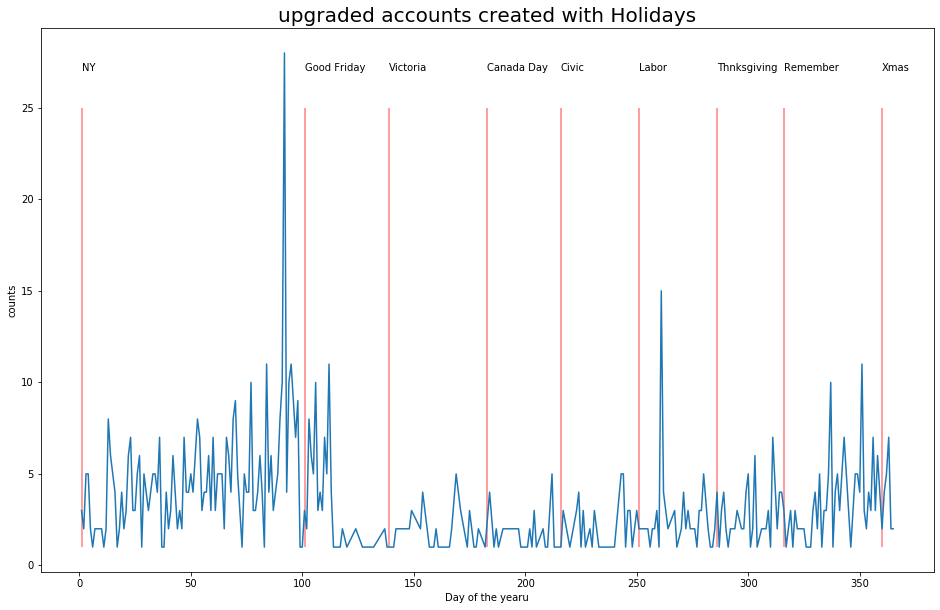

In [198]:
data_holidays = bs_cs.groupby(['Day_of_yearu']).size().reset_index(name='counts')

holidays = pd.Series(['2020-01-01', # New Years Day
                     '2020-04-10', # Good Friday
                     '2020-05-18', # Victoria Day
                     '2020-07-01', # Canada Day
                     '2020-08-03', # Civic Holiday
                     '2020-09-07', # Labor Day
                     '2020-10-12', # Thanksgiving
                     '2020-11-11', # Rememberance Day
                     '2020-12-25']) # Xmas  

holidays = pd.to_datetime(holidays).dt.dayofyear
holiday_names = ['NY',
                 'Good Friday',
                 'Victoria',
                 'Canada Day',
                 'Civic',
                 'Labor',
                 'Thnksgiving',
                 'Remember',
                 'Xmas']
                 

fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x='Day_of_yearu', y='counts', ax=ax, data=data_holidays)
plt.xlabel('Day of the yearu')
plt.vlines(holidays, 1, 25, alpha=0.5, color ='r')
plt.title('upgraded accounts created with Holidays', fontsize=20)
for i in range(len(holidays)):
    plt.text(x=holidays[i], y=27, s=holiday_names[i])

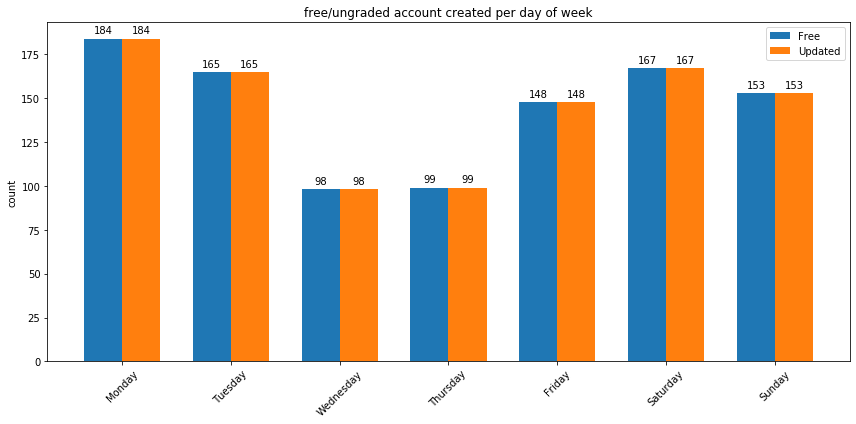

In [194]:
M = 7

labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']

mof = bs_cs[bs_cs.weekdayf == 0].shape[0]
mou = bs_cs[bs_cs.weekdayu == 0].shape[0]
tuf = bs_cs[bs_cs.weekdayf == 1].shape[0]
tuu = bs_cs[bs_cs.weekdayu == 1].shape[0]
wef = bs_cs[bs_cs.weekdayf == 2].shape[0]
weu = bs_cs[bs_cs.weekdayu == 2].shape[0]
thf = bs_cs[bs_cs.weekdayf == 3].shape[0]
thu = bs_cs[bs_cs.weekdayu == 3].shape[0]
frf = bs_cs[bs_cs.weekdayf == 4].shape[0]
fru = bs_cs[bs_cs.weekdayu == 4].shape[0]
saf = bs_cs[bs_cs.weekdayf == 5].shape[0]
sau = bs_cs[bs_cs.weekdayu == 5].shape[0]
suf = bs_cs[bs_cs.weekdayf == 6].shape[0]
suu = bs_cs[bs_cs.weekdayu == 6].shape[0]

freeCount = (mof, tuf, wef, thf, frf, saf, suf)
updateCount = (mou, tuu, weu, thu, fru, sau, suu)

ind = np.arange(M)    
width = 0.35       

fig, ax = plt.subplots(figsize=(12,6))
a1 = ax.bar(ind - width/2, freeCount, width)
b1 = ax.bar(ind + width/2, updateCount, width)

ax.set_ylabel('count')
ax.set_title('free/ungraded account created per day of week')
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation=45)
ax.legend((a1[0], b1[0]),('Free', 'Updated'))


def autolabel(x):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i in x:
        height = i.get_height()
        ax.annotate('{}'.format(height),
                    xy=(i.get_x() + i.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(a1)
autolabel(b1)

fig.tight_layout()
#plt.savefig('figures/per weekday.png')
plt.show()

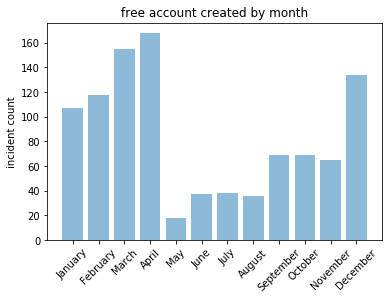

In [178]:
jan = bs_cs[bs_cs.monthf == 1].monthf.value_counts()
feb = bs_cs[bs_cs.monthf == 2].monthf.value_counts()
mar = bs_cs[bs_cs.monthf == 3].monthf.value_counts()
apr = bs_cs[bs_cs.monthf == 4].monthf.value_counts()
may = bs_cs[bs_cs.monthf == 5].monthf.value_counts()
jun = bs_cs[bs_cs.monthf == 6].monthf.value_counts()
jul = bs_cs[bs_cs.monthf == 7].monthf.value_counts()
aug = bs_cs[bs_cs.monthf == 8].monthf.value_counts()
sep = bs_cs[bs_cs.monthf == 9].monthf.value_counts()
octo = bs_cs[bs_cs.monthf == 10].monthf.value_counts()
nov = bs_cs[bs_cs.monthf == 11].monthf.value_counts()
dec = bs_cs[bs_cs.monthf == 12].monthf.value_counts()

Months = ('January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October','November', 'December')
ind = np.arange(len(Months))
incidentCount = [jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,134]

plt.bar(ind, incidentCount, align='center', alpha=0.5)
plt.xticks(ind, Months, rotation=45)
plt.ylabel('incident count')
plt.title('free account created by month')
#plt.savefig('per month.png')
plt.show()

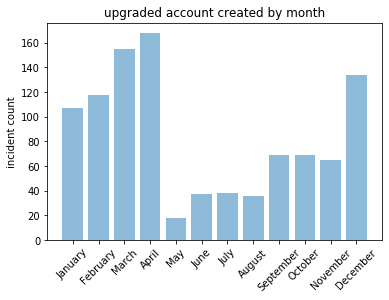

In [193]:
jan = bs_cs[bs_cs.monthu == 1].monthu.value_counts()
feb = bs_cs[bs_cs.monthu == 2].monthu.value_counts()
mar = bs_cs[bs_cs.monthu == 3].monthu.value_counts()
apr = bs_cs[bs_cs.monthu == 4].monthu.value_counts()
may = bs_cs[bs_cs.monthu == 5].monthu.value_counts()
jun = bs_cs[bs_cs.monthu == 6].monthu.value_counts()
jul = bs_cs[bs_cs.monthu == 7].monthu.value_counts()
aug = bs_cs[bs_cs.monthu == 8].monthu.value_counts()
sep = bs_cs[bs_cs.monthu == 9].monthu.value_counts()
octo = bs_cs[bs_cs.monthu == 10].monthu.value_counts()
nov = bs_cs[bs_cs.monthu == 11].monthu.value_counts()
dec = bs_cs[bs_cs.monthu == 12].monthu.value_counts()

Months = ('January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October','November', 'December')
ind = np.arange(len(Months))
incidentCount = [jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,134]

plt.bar(ind, incidentCount, align='center', alpha=0.5)
plt.xticks(ind, Months, rotation=45)
plt.ylabel('incident count')
plt.title('upgraded account created by month')
#plt.savefig('per month.png')
plt.show()

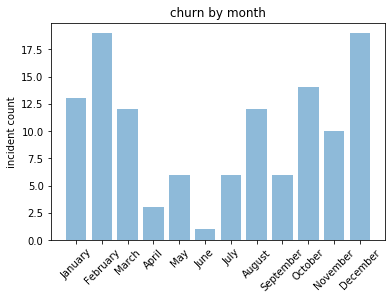

In [192]:
jan = churn[churn.monthc == 1].monthc.value_counts()
feb = churn[churn.monthc == 2].monthc.value_counts()
mar = churn[churn.monthc == 3].monthc.value_counts()
apr = churn[churn.monthc == 4].monthc.value_counts()
may = churn[churn.monthc == 5].monthc.value_counts()
jun = churn[churn.monthc == 6].monthc.value_counts()
jul = churn[churn.monthc == 7].monthc.value_counts()
aug = churn[churn.monthc == 8].monthc.value_counts()
sep = churn[churn.monthc == 9].monthc.value_counts()
octo = churn[churn.monthc == 10].monthc.value_counts()
nov = churn[churn.monthc == 11].monthc.value_counts()
dec = churn[churn.monthc == 12].monthc.value_counts()

Months = ('January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October','November', 'December')
ind = np.arange(len(Months))
incidentCount = [jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,19]

plt.bar(ind, incidentCount, align='center', alpha=0.5)
plt.xticks(ind, Months, rotation=45)
plt.ylabel('incident count')
plt.title('churn by month')
#plt.savefig('per month.png')
plt.show()

In [209]:
churn.yearc.value_counts()

2018.0    79
2019.0    42
Name: yearc, dtype: int64

In [185]:
churn.yearc.unique()

array([  nan, 2019., 2018.])

In [180]:
churn.head()

,Billing Account #,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Charges,Customer ID,Free Account Created Date,Last Seen,Session,Segment
25,AX#12986,cancelled,2019-04-21,NaT,33.833333,322,2018-10-05,2019-04-26 19:45:48,1,Marketing Segment 2
41,AX#14045,cancelled,2019-01-19,2019-03-17,229.900000,533,2018-12-29,2019-04-26 18:12:32,10,Marketing Segment 3
48,AX#14562,cancelled,2018-09-05,2018-11-05,372.100000,262,2018-09-05,2018-12-12 23:06:25,39,Marketing Segment 2
49,AX#14616,cancelled,2018-03-16,2018-05-22,294.800000,108,2018-03-10,2018-05-22 05:22:40,3,Marketing Segment 2
71,AX#16760,cancelled,2018-06-15,2018-07-26,343.033333,166,2018-06-14,2018-07-29 18:15:47,2,Marketing Segment 1


In [181]:
churn.shape

(123, 10)

In [182]:
churn["dayc"] = churn["Upgraded Account Cancelled Date"].dt.day
churn["monthc"] = churn["Upgraded Account Cancelled Date"].dt.month
churn["yearc"] = churn["Upgraded Account Cancelled Date"].dt.year

In [174]:
bs_cs[bs_cs.monthf == 12].monthf.value_counts()

12    134
Name: monthf, dtype: int64

In [27]:
bs_cs.dtypes

Billing Account #                          object
Account Status                             object
Upgraded Account Created Date      datetime64[ns]
Upgraded Account Cancelled Date    datetime64[ns]
Charges                                   float64
Customer ID                                 int64
Free Account Created Date          datetime64[ns]
Last Seen                          datetime64[ns]
Session                                     int64
Segment                                    object
dayf                                        int64
monthf                                      int64
yearf                                       int64
weekdayf                                    int64
Day_of_yearf                                int64
dayu                                        int64
monthu                                      int64
yearu                                       int64
weekdayu                                    int64
Day_of_yearu                                int64


In [71]:
bs_cs[bs_cs['Billing Account #'].duplicated()]

,Billing Account #,Account Status,Upgraded Account Created Date,Upgraded Account Cancelled Date,Charges,Customer ID,Free Account Created Date,Last Seen,Session,Segment,dayf,monthf,yearf,dayu,monthu,yearu
33,AX#13658,paying,2018-11-11,NaT,750.400000,645,2019-02-05,2019-04-15 17:14:42,5,Marketing Segment 3,5,2,2019,11,11,2018
34,AX#13658,paying,2019-02-21,NaT,242.000000,294,2018-09-18,2018-11-27 19:47:13,3,Marketing Segment 3,18,9,2018,21,2,2019
35,AX#13658,paying,2019-02-21,NaT,242.000000,645,2019-02-05,2019-04-15 17:14:42,5,Marketing Segment 3,5,2,2019,21,2,2019
189,AX#26417,paying,2018-11-08,NaT,1516.200000,344,2018-10-16,2018-10-23 18:19:38,1,Marketing Segment 2,16,10,2018,8,11,2018
190,AX#26417,paying,2017-12-15,NaT,2844.300000,13,2017-06-20,2019-04-23 15:55:56,2191,Marketing Segment 1,20,6,2017,15,12,2017
191,AX#26417,paying,2017-12-15,NaT,2844.300000,344,2018-10-16,2018-10-23 18:19:38,1,Marketing Segment 2,16,10,2018,15,12,2017
277,AX#33896,cancelled,2018-04-14,2019-02-02,2195.200000,125,2018-04-08,2018-07-13 15:10:58,2,Marketing Segment 2,8,4,2018,14,4,2018
278,AX#33896,paying,2018-03-23,NaT,735.166667,54,2017-12-17,2019-04-27 22:25:05,267,Marketing Segment 1,17,12,2017,23,3,2018
279,AX#33896,paying,2018-03-23,NaT,735.166667,125,2018-04-08,2018-07-13 15:10:58,2,Marketing Segment 2,8,4,2018,23,3,2018
398,AX#45042,paying,2019-04-01,NaT,128.700000,880,2019-04-02,2019-04-28 08:28:23,5,Marketing Segment 3,2,4,2019,1,4,2019


In [32]:
cs[cs['Billing Account #'].duplicated()]

,Customer ID,Free Account Created Date,Last Seen,Session,Segment,Billing Account #
124,125,2018-04-08,2018-07-13 15:10:58,2,Marketing Segment 2,AX#33896
228,229,2018-08-12,2019-04-28 14:26:25,170,Marketing Segment 1,AX#56582
343,344,2018-10-16,2018-10-23 18:19:38,1,Marketing Segment 2,AX#26417
644,645,2019-02-05,2019-04-15 17:14:42,5,Marketing Segment 3,AX#13658
690,691,2019-02-21,2019-04-28 19:21:07,10,Marketing Segment 2,AX#98628
711,712,2019-02-25,2019-04-28 08:24:16,10,Marketing Segment 1,AX#84649
879,880,2019-04-02,2019-04-28 08:28:23,5,Marketing Segment 3,AX#45042


In [63]:
bs_cs.head()

,Account Status,Upgraded Account Cancelled Date,Charges,Last Seen,Session,Segment,dayf,monthf,yearf,dayu,monthu,yearu
0,paying,NaT,332.800000,2019-04-18 20:37:12,8,Marketing Segment 3,19,3,2019,20,3,2019
1,paying,NaT,451.133333,2019-04-28 14:40:36,7,Marketing Segment 1,14,11,2018,17,1,2019
2,paying,NaT,1886.800000,2019-04-28 14:26:40,10744,Marketing Segment 2,14,7,2018,28,9,2018
3,paying,NaT,797.866667,2019-04-28 12:40:38,14,Marketing Segment 3,27,10,2018,21,12,2018
4,paying,NaT,189.000000,2019-04-28 14:59:42,1,Marketing Segment 3,1,4,2019,1,4,2019


In [216]:
ml2 = bs_cs

In [238]:
ml2.head()

,Account Status,Charges,Session,Segment,dayu,monthu,yearu,dayf,monthf,yearf
0,1,332.800000,8,3,19,3,2019,19,3,2019
1,1,451.133333,7,1,14,11,2018,14,11,2018
2,1,1886.800000,10744,2,14,7,2018,14,7,2018
3,1,797.866667,14,3,27,10,2018,27,10,2018
4,1,189.000000,1,3,1,4,2019,1,4,2019


In [221]:
ml2.drop(["Billing Account #", "Upgraded Account Created Date", "Customer ID", "Free Account Created Date"], axis=1, inplace=True)

SyntaxError: invalid syntax (<ipython-input-221-a5d3e12675eb>, line 1)

In [231]:
ml2.drop(["Day_of_yearu"], axis=1, inplace=True)

In [77]:
ml.head()

0    Marketing Segment 3
1                      1
2    Marketing Segment 2
3    Marketing Segment 3
4    Marketing Segment 3
Name: Segment, dtype: object

In [233]:
ml2['Segment'].replace('Marketing Segment 1', 1, inplace=True)

In [234]:
ml2['Segment'].replace('Marketing Segment 2', 2, inplace=True)

In [235]:
ml2['Segment'].replace('Marketing Segment 3', 3, inplace=True)

In [236]:
ml2['Account Status'].replace('paying', 1, inplace=True)

In [237]:
ml2['Account Status'].replace('cancelled', 0, inplace=True)

In [149]:
ml.head()

,Account Status,Charges,Session,Segment,dayf,monthf,yearf,dayu,monthu,yearu,dayc,monthc,yearc
0,1,332.800000,8,3,19,3,2019,20,3,2019,0.0,0.0,0.0
1,1,451.133333,7,1,14,11,2018,17,1,2019,0.0,0.0,0.0
2,1,1886.800000,10744,2,14,7,2018,28,9,2018,0.0,0.0,0.0
3,1,797.866667,14,3,27,10,2018,21,12,2018,0.0,0.0,0.0
4,1,189.000000,1,3,1,4,2019,1,4,2019,0.0,0.0,0.0


In [131]:
test["dayc"] = test["Upgraded Account Cancelled Date"].dt.day
test["monthc"] = test["Upgraded Account Cancelled Date"].dt.month
test["yearc"] = test["Upgraded Account Cancelled Date"].dt.year

In [134]:
test['dayc'].fillna(0, inplace = True)

In [136]:
test['monthc'].fillna(0, inplace = True)

In [137]:
test['yearc'].fillna(0, inplace = True)

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X = ml.drop('Account Status',axis=1)
y = ml['Account Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [153]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
dtree = DecisionTreeClassifier()

In [155]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [156]:
predictions = dtree.predict(X_test)

In [157]:
from sklearn.metrics import classification_report,confusion_matrix

In [158]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        37
           1       0.99      1.00      1.00       268

    accuracy                           0.99       305
   macro avg       1.00      0.97      0.98       305
weighted avg       0.99      0.99      0.99       305



In [159]:
print(confusion_matrix(y_test,predictions))

[[ 35   2]
 [  0 268]]


In [239]:
X = ml2.drop('Account Status',axis=1)
y = ml2['Account Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [240]:
dtree = DecisionTreeClassifier()

In [241]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [242]:
predictions = dtree.predict(X_test)

In [243]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.51      0.52        37
           1       0.93      0.94      0.93       268

    accuracy                           0.89       305
   macro avg       0.73      0.73      0.73       305
weighted avg       0.88      0.89      0.88       305



In [244]:
print(confusion_matrix(y_test,predictions))

[[ 19  18]
 [ 17 251]]
